In [298]:
%matplotlib inline
from IPython.core.display import HTML
from IPython.display import YouTubeVideo

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path1 = os.path.join(os.getcwd(),'style-table.css')
path2 = os.path.join(os.getcwd(),'style-notebook.css')

css = open(path1).read() + open(path2).read()
HTML('<style>{}</style>'.format(css))

### load data from one year (one text file)

In [299]:
os.listdir('names')[:5]

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt']

In [300]:
open('names/yob1880.txt','r').readlines()[:5]

['Mary,F,7065\n',
 'Anna,F,2604\n',
 'Emma,F,2003\n',
 'Elizabeth,F,1939\n',
 'Minnie,F,1746\n']

In [301]:
names2011 = pd.read_csv('names/yob2011.txt',names=['name','gender','number'])

In [302]:
names2011[:5]

,name,gender,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


### load data from all years (many text files)

In [303]:
names_all = []

for year in range(1880,2014+1):
    names_all.append(pd.read_csv('names/yob{0}.txt'.format(year),names=['name','gender','number']))
    names_all[-1]['year'] = year

In [304]:
allyears = pd.concat(names_all)

In [305]:
allyears[:5]

,name,gender,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [306]:
allyears[-5:]

,name,gender,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


### re-format data

In [307]:
allyears_indexed = allyears.set_index(['gender','name','year']).sort_index()

In [308]:
allyears_indexed.index.names

FrozenList(['gender', 'name', 'year'])

In [309]:
allyears_indexed[:5]

number
gender name      year        
F      Aabha     2011       7
                 2012       5
                 2014       9
       Aabriella 2008       5
                 2014       5

In [310]:
allyears_indexed[-5:]

number
gender name      year        
M      Zytavious 2009       7
                 2010       6
       Zyvion    2009       5
       Zyyon     2014       6
       Zzyzx     2010       5

In [311]:
allyears_indexed.loc['F','Sarah'][:5]

,number
year,
1880,1288
1881,1226
1882,1410
1883,1359
1884,1518


### plot data

In [312]:
def plotname(gender,name):
    data = allyears_indexed.loc[gender,name]
    
    plt.plot(data.index,data.values)

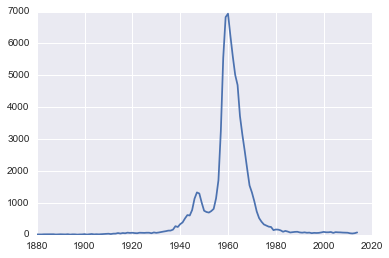

In [313]:
plotname('M','Tim')

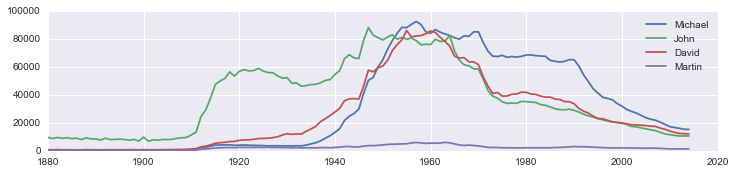

In [314]:
plt.figure(figsize=(12,2.5))
names = ['Michael','John','David','Martin']

for name in names:
    plotname('M',name)
    
plt.legend(names)

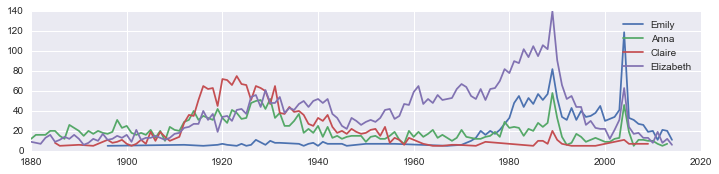

In [315]:
plt.figure(figsize=(12,2.5))
names = ['Emily','Anna','Claire','Elizabeth']

for name in names:
    plotname('M',name)
    
plt.legend(names)

In [316]:
allyears_indexed.loc['F'].loc[names][:5]

number
name year        
Anna 1880    2604
     1881    2698
     1882    3143
     1883    3306
     1884    3860

In [317]:
allyears_indexed.loc['M'].loc[names].unstack('name')[:5]

number                       
name   Anna Claire Elizabeth Emily
year                              
1880     12    NaN         9   NaN
1881     16    NaN       NaN   NaN
1882    NaN    NaN         7   NaN
1883     16    NaN        13   NaN
1884     20    NaN        16   NaN

In [318]:
variants = allyears_indexed.loc['F'].loc[names].unstack('name').fillna(0)

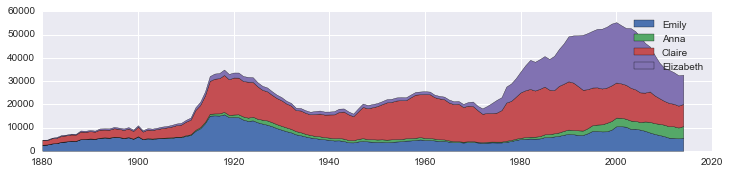

In [319]:
plt.figure(figsize=(12,2.5))

plt.stackplot(variants.index,variants.values.T,labels=names)
plt.legend(names)

### yearly top ten

In [320]:
allyears_indexed.loc['M',:,2000].head()

number
gender name    year        
M      Aadam   2000       6
       Aadarsh 2000       5
       Aadil   2000       9
       Aaditya 2000      11
       Aahil   2000       6

In [321]:
pop2008 = allyears_indexed.loc['M',:,2008].sort_values('number',ascending=False).head()

In [322]:
pop2008.size

5

In [323]:
# axis 0 is rows, axis 1 is columns
pop2008.reset_index().drop(['gender','year','number'],axis=1)

,name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel


In [324]:
def topten(gender,year):
    pop = allyears_indexed.loc[gender,:,year].sort_values('number',ascending=False).reset_index()
    pop = pop.drop(['gender','number','year'],axis=1).head(10)
    pop.index = pop.index + 1
    return pop

In [325]:
topten('F',2000)

,name
1,Emily
2,Hannah
3,Madison
4,Ashley
5,Sarah
6,Alexis
7,Samantha
8,Jessica
9,Elizabeth
10,Taylor


In [326]:
test = topten('F',2000)
test.columns = [1000]
test

,1000
1,Emily
2,Hannah
3,Madison
4,Ashley
5,Sarah
6,Alexis
7,Samantha
8,Jessica
9,Elizabeth
10,Taylor


In [327]:
def toptens(gender,year0,year1):
    
    years = [topten(gender,year) for year in range(year0,year1+1)]
    years_joined = pd.concat(years,axis=1)
    years_joined.columns = range(year0,year1+1)
    
    return years_joined

In [328]:
toptens('M',2000,2010)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
1,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob
2,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Ethan,Ethan
3,Matthew,Matthew,Joshua,Joshua,Joshua,Joshua,Joshua,Ethan,Ethan,Michael,Michael
4,Joshua,Joshua,Matthew,Matthew,Matthew,Matthew,Ethan,Joshua,Joshua,Alexander,Jayden
5,Christopher,Christopher,Ethan,Andrew,Ethan,Ethan,Matthew,Daniel,Daniel,William,William
6,Nicholas,Nicholas,Andrew,Ethan,Andrew,Andrew,Daniel,Christopher,Alexander,Joshua,Alexander
7,Andrew,Andrew,Joseph,Joseph,Daniel,Daniel,Andrew,Anthony,William,Daniel,Noah
8,Joseph,Joseph,Christopher,Daniel,William,Anthony,Christopher,William,Anthony,Jayden,Daniel
9,Daniel,Daniel,Nicholas,Christopher,Joseph,Joseph,Anthony,Matthew,Christopher,Noah,Aiden
10,Tyler,William,Daniel,Anthony,Christopher,Christopher,William,Andrew,Matthew,Christopher,Anthony


In [329]:
toptens('F',1985,1995)

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
1,Jessica,Jessica,Jessica,Jessica,Jessica,Jessica,Ashley,Ashley,Jessica,Jessica,Jessica
2,Ashley,Ashley,Ashley,Ashley,Ashley,Ashley,Jessica,Jessica,Ashley,Ashley,Ashley
3,Jennifer,Amanda,Amanda,Amanda,Brittany,Brittany,Brittany,Amanda,Sarah,Emily,Emily
4,Amanda,Jennifer,Jennifer,Sarah,Amanda,Amanda,Amanda,Brittany,Samantha,Samantha,Samantha
5,Sarah,Sarah,Sarah,Jennifer,Sarah,Samantha,Samantha,Sarah,Emily,Sarah,Sarah
6,Stephanie,Stephanie,Stephanie,Brittany,Samantha,Sarah,Sarah,Samantha,Brittany,Taylor,Taylor
7,Nicole,Nicole,Brittany,Stephanie,Jennifer,Stephanie,Stephanie,Emily,Taylor,Brittany,Hannah
8,Heather,Brittany,Nicole,Samantha,Stephanie,Jennifer,Jennifer,Stephanie,Amanda,Amanda,Brittany
9,Elizabeth,Heather,Heather,Nicole,Lauren,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Amanda
10,Megan,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Lauren,Emily,Megan,Stephanie,Megan,Elizabeth


In [330]:
toptens('F',1985,1995).stack().head(15)

1  1985    Jessica
   1986    Jessica
   1987    Jessica
   1988    Jessica
   1989    Jessica
   1990    Jessica
   1991     Ashley
   1992     Ashley
   1993    Jessica
   1994    Jessica
   1995    Jessica
2  1985     Ashley
   1986     Ashley
   1987     Ashley
   1988     Ashley
dtype: object

In [331]:
toptens('F',1985,1995).stack().value_counts()

Sarah        11
Amanda       11
Elizabeth    11
Jessica      11
Ashley       11
Brittany     10
Stephanie     9
Samantha      8
Jennifer      7
Emily         5
Nicole        4
Heather       3
Megan         3
Taylor        3
Lauren        2
Hannah        1
dtype: int64

In [332]:
popular = toptens('F',1985,1995).stack().value_counts().index[:6]

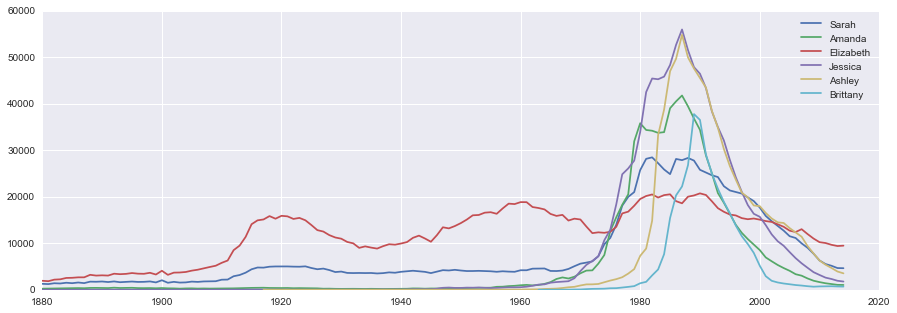

In [333]:
plt.figure(figsize=(15,5))

for name in popular:
    plotname('F',name)
    
plt.legend(popular)

### searching for sudden spikes in naming

In [334]:
allyears.head()

,name,gender,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [335]:
allyears.groupby(['gender','name']).agg('sum').head()

number   year
gender name                    
F      Aabha          21   6037
       Aabriella      10   4022
       Aaden           5   2009
       Aadhira        29   6039
       Aadhya        639  16084

In [336]:
# unlike above, this will display as a series, because there is only one column selected
allyears.groupby(['gender','name'])['number'].agg('sum').head()

gender  name     
F       Aabha         21
        Aabriella     10
        Aaden          5
        Aadhira       29
        Aadhya       639
Name: number, dtype: int64

In [337]:
totals = allyears.groupby(['gender','name'])['number'].agg('sum')

In [338]:
def sumsq(x):
    return sum(x**2)

In [339]:
# you can pass any function into agg()

spikyness = allyears.groupby(['gender','name'])['number'].agg(sumsq) / totals**2

In [340]:
spikyness.head()

gender  name     
F       Aabha        0.351474
        Aabriella    0.500000
        Aaden        1.000000
        Aadhira      0.362663
        Aadhya       0.262673
Name: number, dtype: float64

In [341]:
spiky_commmon = spikyness[totals > 5000].copy()
spiky_commmon = spiky_commmon.sort_values(ascending=False)
spiky_commmon.head()

gender  name     
M       Iker         0.199368
        Shaquille    0.195689
        Jase         0.182165
F       Adalynn      0.177107
        Harper       0.164827
Name: number, dtype: float64

In [342]:
spiky_commmon.tail()

gender  name  
F       Rosa      0.008512
        Mollie    0.008437
M       Ike       0.008310
F       Delia     0.008263
        Louisa    0.007931
Name: number, dtype: float64

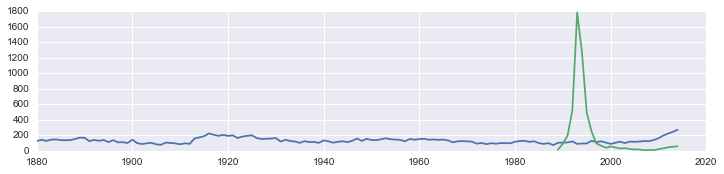

In [343]:
plt.figure(figsize=(12,2.5))

plotname('F','Louisa')
plotname('M','Shaquille')

In [344]:
fads = spiky_commmon.head(10).index.values

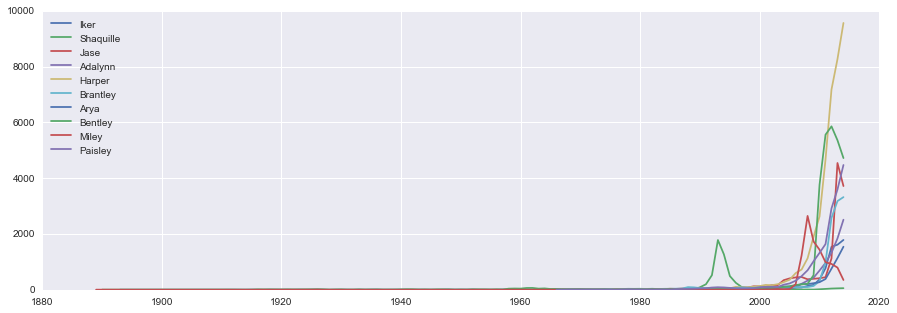

In [345]:
plt.figure(figsize=(15,5))

for gender,name in fads:
    plotname(gender,name)
    
plt.legend([name for gender,name in fads],loc='upper left')

In [346]:
totals_recent = allyears[allyears.year > 2005].groupby(['gender','name'])['number'].agg(sum)

In [347]:
totals_recent.head()

gender  name     
F       Aabha         21
        Aabriella     10
        Aaden          5
        Aadhira       29
        Aadhya       639
Name: number, dtype: int64

In [348]:
spiky_commmon2 = spikyness[(totals > 5000) & (totals_recent < 1000)].copy()
spiky_commmon2 = spiky_commmon2.sort_values(ascending=False)
spiky_commmon2.head()

gender  name     
M       Shaquille    0.195689
F       Katina       0.120872
        Krystle      0.100106
M       Devante      0.099617
F       Khadijah     0.091410
Name: number, dtype: float64

In [349]:
fads2 = spiky_commmon2.head(10).index.values

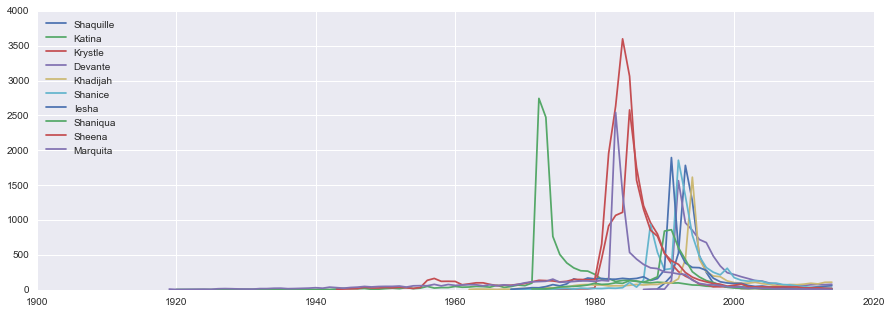

In [350]:
plt.figure(figsize=(15,5))

for gender,name in fads2:
    plotname(gender,name)
    
plt.legend([name for gender,name in fads2],loc='upper left')

### looking at unisex names

In [351]:
allyears.head()

,name,gender,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [362]:
totals = allyears.groupby(['gender','name'])['number'].agg(sum)

In [363]:
by_gender = totals.unstack('gender')

In [364]:
by_gender[:5]

gender,F,M
name,,
Aaban,NaN,72
Aabha,21,NaN
Aabid,NaN,5
Aabriella,10,NaN
Aadam,NaN,196


In [354]:
by_both = by_gender.sum(axis=1)

In [355]:
by_both[:5]

name
Aaban         72
Aabha         21
Aabid          5
Aabriella     10
Aadam        196
dtype: float64

In [366]:
ratio = by_gender['F'] / by_gender['M']
ratio[:5]

name
Aaban       NaN
Aabha       NaN
Aabid       NaN
Aabriella   NaN
Aadam       NaN
dtype: float64

In [357]:
unisex = (ratio > 0.25) & (ratio < 4)

In [376]:
by_both = by_both[unisex]
by_both[:5]

name
Aalijah    262
Aamari     155
Aaren      999
Aareon      43
Aarian     116
dtype: float64

In [378]:
by_both = by_both.sort_values(ascending=False)
by_both[:5]

name
Willie    593888
Jordan    479434
Taylor    416096
Leslie    376587
Jamie     350262
dtype: float64

In [379]:
names = by_both.head(10).index.values
names

array(['Willie', 'Jordan', 'Taylor', 'Leslie', 'Jamie', 'Angel', 'Lee',
       'Jessie', 'Marion', 'Dana'], dtype=object)

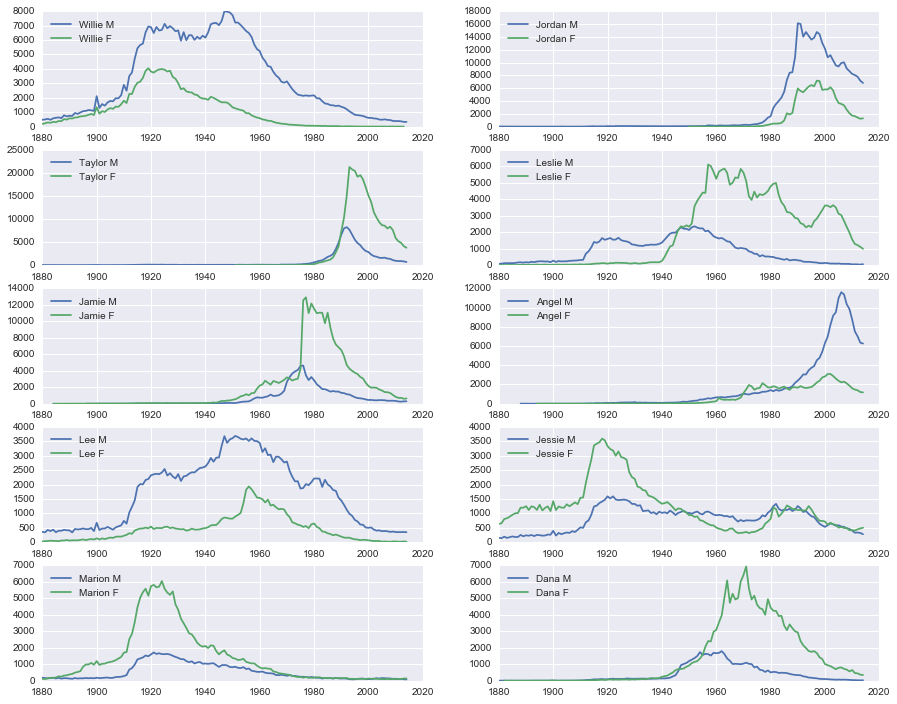

In [382]:
plt.figure(figsize=(15,12))

for i,name in enumerate(names):
    plt.subplot(5,2,i+1)
    
    plotname('M',name)
    plotname('F',name)
    
    plt.legend([name + ' M',name + ' F'],loc='upper left')